In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Imports the **Pandas** library and assigns it the alias pd. Pandas is used for data manipulation and analysis, especially with tabular data.

Imports the **NumPy** library as np. NumPy provides support for numerical operations and handling arrays, which is useful for computations and creating numerical ranges.

Imports two utilities from scikit-learn’s model_selection module:
**train_test_split:** Splits the dataset into training and testing (or validation) subsets.
**learning_curve:** Computes the scores for different training set sizes, useful for visualizing how well the model learns as more data is used.

Imports the **RandomForestClassifier** from scikit-learn’s ensemble module. This is the machine learning algorithm used to build an ensemble of decision trees.

Imports the **Matplotlib** library’s pyplot module as plt. This module is used to create plots and visualizations.

In [3]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reads the train.csv file (from the Kaggle Titanic dataset) into a Pandas DataFrame named data. This file contains the data used for training the model.

In [4]:
# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


Replaces missing values in the Age column with the median age value.
Fills missing values in the Embarked column with the mode (most frequently occurring value).

In [5]:
data = data.drop(['Name','Ticket','Cabin'], axis=1)
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Drops columns Ticket, and Name from the DataFrame. These columns are considered less useful for prediction in this context. The parameter axis=1 indicates that columns (not rows) are being dropped.

In [6]:
print("Unique values before:", data['Sex'].unique())
data['Sex'] = data['Sex'].astype(str).str.lower().map({'male': 0, 'female': 1})
data.head(5)

Unique values before: ['male' 'female']


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


Converts the Sex column into numeric form by mapping 'male' to 0 and 'female' to 1, making it suitable for model training.

In [7]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


Applies *one-hot encoding to the Embarked column*, converting categorical port names into binary (dummy) variables. The parameter drop_first=True avoids redundancy by dropping the first dummy variable.

In [8]:
X = data.drop(['PassengerId', 'Survived'], axis=1)
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,False,False
2,3,1,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,True
4,3,0,35.0,0,0,8.0500,False,True


Creates a DataFrame X containing the feature variables by dropping the PassengerId (an identifier) and Survived (the target variable) columns from the data.

In [9]:
y = data['Survived']
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Extracts the Survived column into a Series y, which is the target variable that the model will learn to predict.

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Splits the dataset into **training and validation sets**:

**X_train and y_train**: Data used to train the model.

**X_val and y_val**: Data used to validate and evaluate the model’s performance.

**test_size=0.2:** reserves 20% of the data for validation.

**random_state=42:** ensures that the split is reproducible.

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

Initializes the **RandomForestClassifier** with:

**n_estimators=100:** Specifies that the forest will consist of 100 decision trees.

**random_state=42:** Ensures reproducibility by fixing the randomness.

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Trains the random forest model using the training data (X_train and y_train), allowing the model to learn patterns and relationships between the features and the target variable.

In [13]:
val_accuracy = rf.score(X_val, y_val)
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

Validation Accuracy: 79.89%


Computes the accuracy of the model on the validation set (X_val and y_val) by comparing the predicted outcomes with the actual labels.

In [14]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=rf, X=X, y=y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

Uses the **learning_curve** function to compute the training and cross-validation scores for different sizes of the training set:

**estimator=rf:** Uses the previously defined Random Forest model.

**X, y:** Uses the full dataset for computing the curve.

**cv=5:** Applies 5-fold cross-validation.

**scoring='accuracy':** Uses accuracy as the evaluation metric.

**train_sizes=np.linspace(0.1, 1.0, 10):** Tests 10 different training set sizes, ranging from 10% to 100% of the data.

**n_jobs=-1:** Utilizes all available CPU cores to speed up computation.

In [15]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

Calculates the mean training score for each training set size by averaging the scores obtained from the 5-fold cross-validation (axis=1 averages over the folds).
Calculates the mean cross-validation (validation) score for each training set size by averaging the scores over the folds.

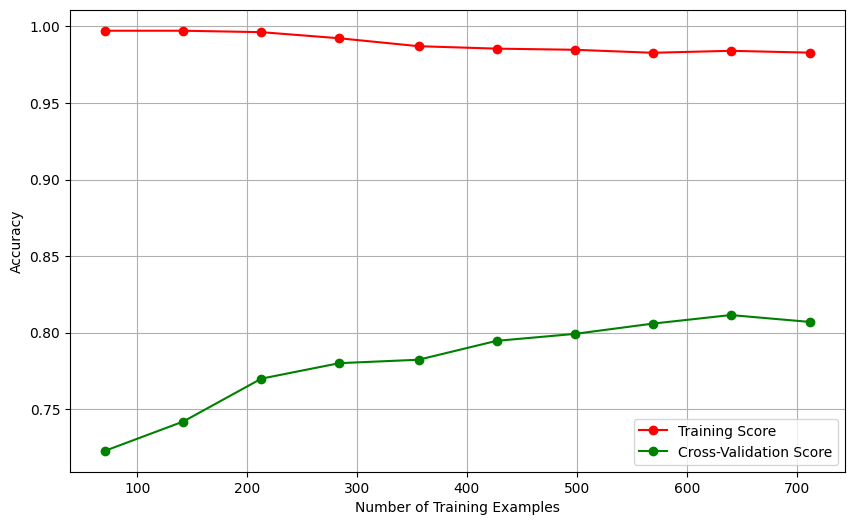

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label="Cross-Validation Score")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Displays the final plot, rendering the learning curve for the Random Forest model on the Titanic dataset.